In [102]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [103]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

In [104]:
X = np.genfromtxt('./data/features.csv',delimiter=',')

In [105]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .1,
                                                 random_state=12)

In [106]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [107]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [108]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [109]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [110]:
X[0].shape

(18,)

In [111]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=30, validation_data=data_validate.batch(32))

Epoch 1/30
644/644 [==============================] - 1s 1ms/step - loss: 0.6543 - accuracy: 0.6224 - val_loss: 0.7234 - val_accuracy: 0.4453
Epoch 2/30
644/644 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7555 - val_loss: 0.6212 - val_accuracy: 0.6733
Epoch 3/30
644/644 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8379 - val_loss: 0.4958 - val_accuracy: 0.7953
Epoch 4/30
644/644 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8602 - val_loss: 0.4571 - val_accuracy: 0.8000
Epoch 5/30
644/644 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.8720 - val_loss: 0.4047 - val_accuracy: 0.8273
Epoch 6/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2943 - accuracy: 0.8836 - val_loss: 0.3425 - val_accuracy: 0.8580
Epoch 7/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2670 - accuracy: 0.8967 - val_loss: 0.3094 - val_accuracy: 0.8660
Epoch 

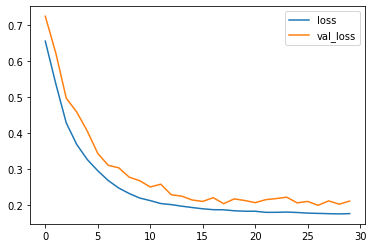

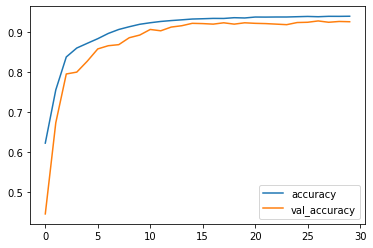

In [114]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()